In [1]:
import os
import shutil

import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


Image.MAX_IMAGE_PIXELS = None

In [2]:
IMAGES_FOLDER = "data/coupes_jpg"
destination_folder = "data/split/"

labels = pd.read_csv("data/labels.csv")
labels.head(10)

,filename,width,height,class,label,xmin,ymin,xmax,ymax
0,D-1M01-2.jpg,4389,4225,Primary,2,3024,2374,3625,2747
1,D-1M01-2.jpg,4389,4225,Primordial,1,404,2191,541,2321
2,D-1M01-2.jpg,4389,4225,Secondary,3,724,2117,1475,2809
3,D-1M01-2.jpg,4389,4225,Secondary,3,1070,550,1777,1218
4,D-1M01-2.jpg,4389,4225,Secondary,3,1954,614,2982,1687
5,D-1M01-3.jpg,5870,5705,Negative,0,860,1261,1660,2093
6,D-1M01-3.jpg,5870,5705,Negative,0,911,3098,1735,4004
7,D-1M01-3.jpg,5870,5705,Negative,0,1280,1038,1571,1201
8,D-1M01-3.jpg,5870,5705,Negative,0,2407,5199,2613,5354
9,D-1M01-3.jpg,5870,5705,Negative,0,2882,5386,3069,5493


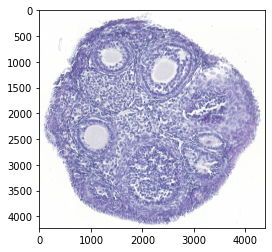

In [3]:
image_basename = labels.iloc[0]["filename"]
coupe = Image.open(os.path.join(IMAGES_FOLDER, image_basename))
plt.imshow(coupe)

In [4]:
split_to_images = {
    "train": [
        'D-1M01-2.jpg',
        'D-1M01-3.jpg',
        'D-1M01-4.jpg',
        'D-1M01-5.jpg',
        'D-1M01-6.jpg',
        'D-1M02-1.jpg',
        'D-1M02-2.jpg',
        'D-1M02-3.jpg',
        'D-1M02-4.jpg',
        'D-1M02-5.jpg',
        'D-1M02-6.jpg',
        'D-1M03-1.jpg',
        'D-1M03-2.jpg',
        'D-1M03-3.jpg',
        'D-1M03-4.jpg',
        'D-1M03-5.jpg',
        'D-1M03-6.jpg',
        'D-1M04-1.jpg',
        'D-1M04-2.jpg',
        'D-1M04-3.jpg',
        'D-1M04-4.jpg',
        'D-1M04-5.jpg',
        'D-1M04-6.jpg',
    ],
    "val": [
        'D-1M05-1.jpg',
        'D-1M05-2.jpg',
        'D-1M05-3.jpg',
        'D-1M05-4.jpg',
        'D-1M05-5.jpg',
        'D-1M05-6.jpg',
    ],
    "test":[
        'D-1M06-1.jpg',
        'D-1M06-2.jpg',
        'D-1M06-3.jpg',
        'D-1M06-4.jpg',
        'D-1M06-5.jpg',
    ],
}

images_to_split = {
    image: split
    for split, images in split_to_images.items()
    for image in images
}

In [7]:
def save_thumbnails(labels, images_to_split, destination_folder):
    # clean destination folder
    if os.path.exists(destination_folder):
        shutil.rmtree(destination_folder)

    errors = []
    for image_basename, df in labels.groupby("filename"):
        split_folder = images_to_split[image_basename]
        print(f"Creating thumbnails for image {image_basename} in split {split_folder}")
        image = Image.open(os.path.join(IMAGES_FOLDER, image_basename))
        for _, row in df.iterrows():
            class_ = row["class"]
            label = row["label"]
            bbox = row[["xmin", "ymin", "xmax", "ymax"]].values.tolist()
            label_folder = f'{label}_{class_}'
            thumbnail_basename = "{}-{}-xmin{}-ymin{}-xmax{}-ymax{}.jpg".format(
                image_basename, 
                class_,
                *bbox
            )
            full_filename = os.path.join(destination_folder, split_folder, label_folder, thumbnail_basename)
            os.makedirs(os.path.dirname(full_filename), exist_ok=True)
            thumbnail = image.crop(bbox)
            try:
                thumbnail.save(full_filename)
            except OSError:
                if os.path.exists(full_filename):
                    os.remove(full_filename)
                errors.append(full_filename)

    if errors:
        print(f"The following thumbnails could not be saved ({len(errors)})")
        for filename in errors:
            print(filename)


In [8]:
save_thumbnails(labels, images_to_split, destination_folder)

Creating thumbnails for image D-1M01-2.jpg in split train
Creating thumbnails for image D-1M01-3.jpg in split train
Creating thumbnails for image D-1M01-4.jpg in split train
Creating thumbnails for image D-1M01-5.jpg in split train
Creating thumbnails for image D-1M01-6.jpg in split train
Creating thumbnails for image D-1M02-1.jpg in split train
Creating thumbnails for image D-1M02-2.jpg in split train
Creating thumbnails for image D-1M02-3.jpg in split train
Creating thumbnails for image D-1M02-4.jpg in split train
Creating thumbnails for image D-1M02-5.jpg in split train
Creating thumbnails for image D-1M02-6.jpg in split train
Creating thumbnails for image D-1M03-1.jpg in split train
Creating thumbnails for image D-1M03-2.jpg in split train
Creating thumbnails for image D-1M03-3.jpg in split train
Creating thumbnails for image D-1M03-4.jpg in split train
Creating thumbnails for image D-1M03-5.jpg in split train
Creating thumbnails for image D-1M03-6.jpg in split train
Creating thumb